In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
metro_pd = pd.read_csv('../CoVID-19_Dashboard_Data.csv')

In [3]:
type(metro_pd.Date[0])

str

In [4]:
metro_pd.Date = pd.to_datetime(metro_pd.Date)

In [5]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
a = metro_pd.set_index('Date')

In [7]:
a.index

DatetimeIndex(['2020-02-12 06:00:00', '2020-02-13 06:00:00',
               '2020-02-14 06:00:00', '2020-02-15 06:00:00',
               '2020-02-16 06:00:00', '2020-02-17 06:00:00',
               '2020-02-18 06:00:00', '2020-02-19 06:00:00',
               '2020-02-20 06:00:00', '2020-02-21 06:00:00',
               ...
               '2020-06-23 05:00:00', '2020-06-24 05:00:00',
               '2020-06-25 05:00:00', '2020-06-26 05:00:00',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='Date', length=142, freq=None)

In [8]:
b = a.loc[a.index.dropna()]

In [9]:
b

,ObjectId,ReportedOn,ReportedCum,Deceased,Recovered,Hospitalized,ICU,Vent,StillIll,PosPatients,...,BCLabTests,BCTestNegative,BCTestPositive,BCTestInc,DBCLabTests,DBCTestNegative,DBCTestPositive,DBCTestInc,WeekQuar,EverQuar
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-12 06:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 06:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 06:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-15 06:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16 06:00:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-22 05:00:00,132,274.0,7156.0,0.0,2807.0,601.0,240.0,100.0,4252.0,446.0,...,112973.0,103757.0,9118.0,98.0,2071.0,1647.0,424.0,0.0,NaN,NaN
2020-06-23 05:00:00,133,311.0,7467.0,3.0,2827.0,613.0,242.0,102.0,4540.0,518.0,...,114660.0,105188.0,9371.0,101.0,1687.0,1431.0,253.0,3.0,NaN,NaN
2020-06-24 05:00:00,134,347.0,7814.0,4.0,2975.0,NaN,244.0,104.0,4735.0,555.0,...,118811.0,108414.0,10296.0,101.0,4151.0,3226.0,925.0,0.0,NaN,NaN


In [10]:
type(metro_pd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
c = b['PosPatients'].dropna()

In [12]:
type(c.index[0])

pandas._libs.tslibs.timestamps.Timestamp

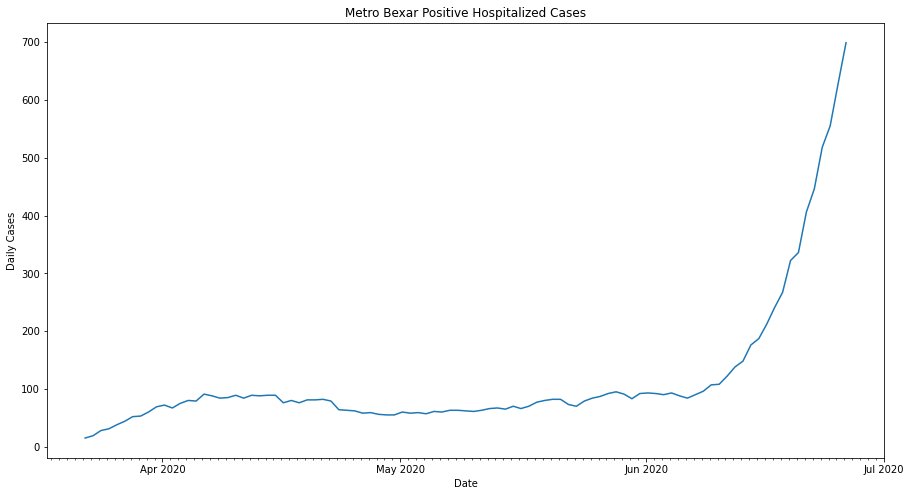

In [13]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Daily Cases',color='black')
plt.title('Metro Bexar Positive Hospitalized Cases')
#plt.bar(c.index,c)
plt.plot(c)
fig.savefig('MetroPosHospitalized.png')

In [14]:
c

Date
2020-03-22 06:00:00     15.0
2020-03-23 06:00:00     19.0
2020-03-24 06:00:00     28.0
2020-03-25 06:00:00     31.0
2020-03-26 06:00:00     38.0
                       ...  
2020-06-22 05:00:00    446.0
2020-06-23 05:00:00    518.0
2020-06-24 05:00:00    555.0
2020-06-25 05:00:00    628.0
2020-06-26 05:00:00    699.0
Name: PosPatients, Length: 97, dtype: float64

In [15]:
x = c.diff(periods = 1)

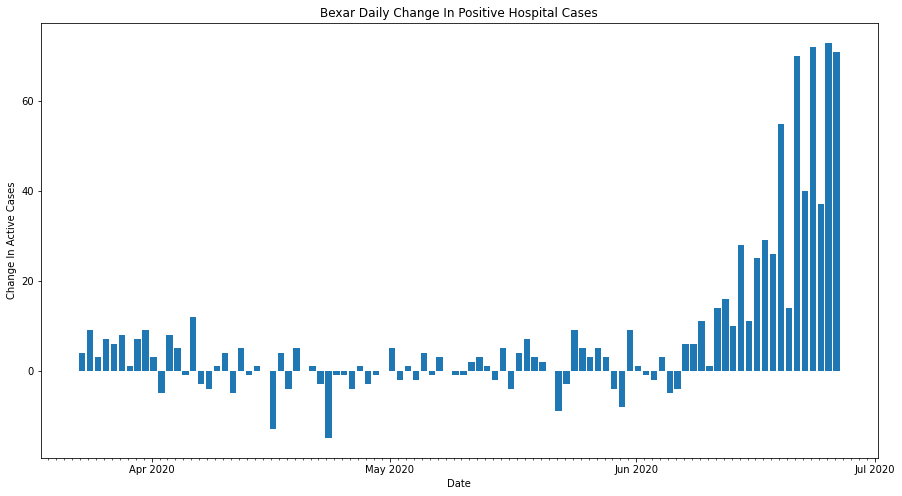

In [16]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Change In Active Cases',color='black')
plt.title('Bexar Daily Change In Positive Hospital Cases')
plt.bar(x.index,x)
fig.savefig('BexarChangeInPosHospitalCases.png')

In [17]:
x

Date
2020-03-22 06:00:00     NaN
2020-03-23 06:00:00     4.0
2020-03-24 06:00:00     9.0
2020-03-25 06:00:00     3.0
2020-03-26 06:00:00     7.0
                       ... 
2020-06-22 05:00:00    40.0
2020-06-23 05:00:00    72.0
2020-06-24 05:00:00    37.0
2020-06-25 05:00:00    73.0
2020-06-26 05:00:00    71.0
Name: PosPatients, Length: 97, dtype: float64